In [1]:
import numpy as np
import random
import scipy.stats as st
from pylab import *
import matplotlib.pyplot as plt
import pandas as pd
#import plotly.plotly as py
#import plotly.figure_factory as ff
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
%matplotlib inline

In [2]:
#создание DataFrame с помощью чтения данных из файла
frame = pd.read_csv('Zad4.csv', header=0, sep=';')

In [3]:
frame = frame.rename(columns={'Unnamed: 0': 'Year', 'Y': 'Response' , 'X1': 'Factor_1_Х1' , 'X2': 'Factor_2_Х2'})
frame.head()

,Year,Response,Factor_1_Х1,Factor_2_Х2
0,2001,"56,09","2,62","-3,35"
1,2002,"57,63","4,13","-0,95"
2,2003,"58,69","4,18","-0,33"
3,2004,"73,68","4,98","0,56"
4,2005,"44,38","2,84","-3,24"


In [4]:
#Перевод данных в рабочий вид, замена запятых на точки и перевод в тип float
frame['Response'] = frame['Response'].apply(lambda x: x.replace(',', '.'))
frame['Factor_1_Х1'] = frame['Factor_1_Х1'].apply(lambda x: x.replace(',', '.'))
frame['Factor_2_Х2'] = frame['Factor_2_Х2'].apply(lambda x: x.replace(',', '.'))
frame['Response'] = frame['Response'].apply(lambda x: float(x))
frame['Factor_1_Х1'] = frame['Factor_1_Х1'].apply(lambda x: float(x))
frame['Factor_2_Х2'] = frame['Factor_2_Х2'].apply(lambda x: float(x))

In [69]:
frame.head()
#frame

,Year,Response,Factor_1_Х1,Factor_2_Х2
0,2001,56.09,2.62,-3.35
1,2002,57.63,4.13,-0.95
2,2003,58.69,4.18,-0.33
3,2004,73.68,4.98,0.56
4,2005,44.38,2.84,-3.24


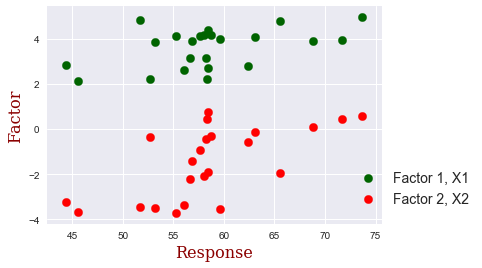

In [6]:
#Зависимость отзывов от двух факторов.
ax = frame.plot.scatter('Response','Factor_1_Х1', s=70, color='DarkGreen', Label = "Factor 1, X1")
frame.plot.scatter( 'Response','Factor_2_Х2', color='Red', s=70, Label = "Factor 2, X2", ax = ax)
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.3, 0.3), fontsize = 'small')
xlabel('Response', fontdict=font, labelpad=None)
ylabel('Factor', fontdict=font, labelpad=None);
#ax.legend(bbox_to_anchor=(1.1, 1.05))
#show()

# 4.a Построить матричную диаграмму рассеяния наблюдений.

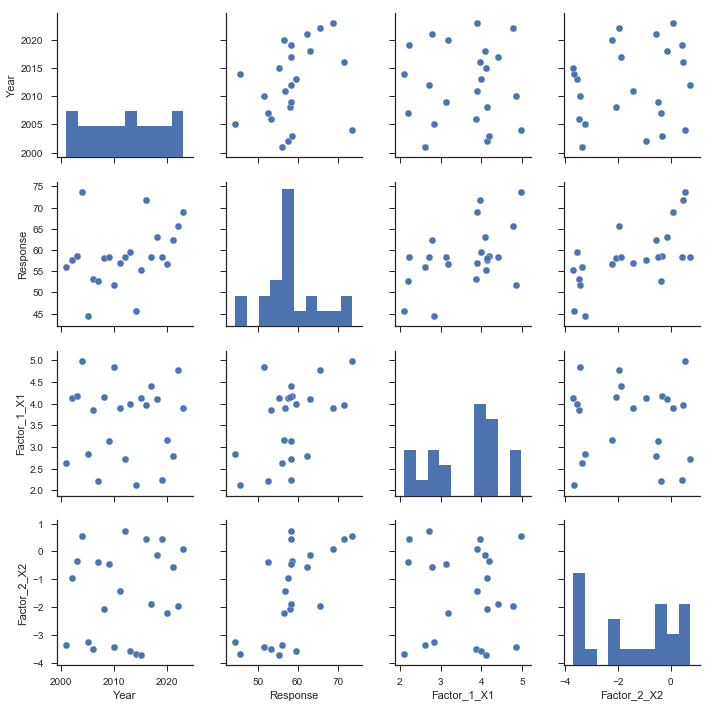

In [7]:
#fig = ff.create_scatterplotmatrix(frame, height=800, width=800)
#py.iplot(fig)
sns.set(style="ticks")
sns.pairplot(frame,diag_kind = 'hist');
#show()

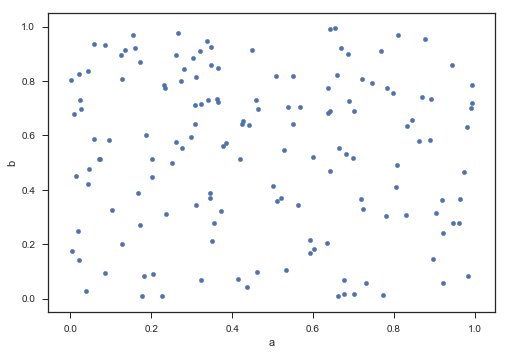

In [8]:
# Test scatter plot
df = pd.DataFrame(np.random.rand(150, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter('a','b')
show()

# 4.б Подогнать модель линейной регрессии: получить оценки параметров и их 99% -доверительные интервалы

In [9]:
print(frame.corr())

                 Year  Response  Factor_1_Х1  Factor_2_Х2
Year         1.000000  0.319997    -0.012624     0.167514
Response     0.319997  1.000000     0.482390     0.648094
Factor_1_Х1 -0.012624  0.482390     1.000000    -0.038206
Factor_2_Х2  0.167514  0.648094    -0.038206     1.000000


###### Несложно заметить, что кореляция Response самая сильная с фактором 2, потом с фактором 1 и чуть меньше с годом. Будем строить модель зависимости от 2 фактором Х1 и Х2

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(frame[["Factor_1_Х1"] + ["Factor_2_Х2"]], frame[["Response"]])
print(lr.coef_)
print(lr.intercept_)

[[ 4.09548459  2.9669591 ]]
[ 48.12111521]


In [11]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Response ~ Factor_1_Х1+Factor_2_Х2', data = frame)
fitted = model.fit(alpha = 0.1)
fitted.summary( alpha=0.01 )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sun, 20 May 2018   Prob (F-statistic):           1.21e-05
Time:                        14:50:16   Log-Likelihood:                -64.070
No. Observations:                  23   AIC:                             134.1
Df Residuals:                      20   BIC:                             137.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [99.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      48.1211      3.866     12.446      0.000        37.120    59.123
Factor_1_Х1     4.0955      1.025      3.997      0.001         1.180     7.011
Factor_2_Х2     2.9670      0.565      5.254      0.000         1.360     4.574
==============================================================================
Omnibus:                        2.578   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.281
Skew:                           0.181   Prob(JB):                        0.527
Kurtosis:                       1.902   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Смотрим на парамер P,   с достоверностью 99 %  оба фактора значимы в данной модели. 

In [12]:
print(lr.coef_)
print(lr.intercept_)
fitted.conf_int(alpha=0.05, cols=None)#Доверительный интервал 95 % точность

[[ 4.09548459  2.9669591 ]]
[ 48.12111521]


,0,1
Intercept,40.055762,56.186469
Factor_1_Х1,1.958321,6.232648
Factor_2_Х2,1.788904,4.145014


In [13]:
print(lr.coef_)
print(lr.intercept_)
print("Доверительные интервалы параметров с точностью 99 %")
fitted.conf_int(alpha=0.01, cols=None)#Доверительный интервал 99 % точность

[[ 4.09548459  2.9669591 ]]
[ 48.12111521]
Доверительные интервалы параметров с точностью 99 %


,0,1
Intercept,37.119642,59.122588
Factor_1_Х1,1.180305,7.010664
Factor_2_Х2,1.360044,4.573874


## Модель линейной регрессии описываеться уравнением:    Response = 4.095* Factor_1_Х1 + 2.967* Factor_2_Х2 + 48.121 

### 3D График
###### Модель линейной регрессии описываеться уравнением:    Response = 4.095* Factor_1_Х1 + 2.967* Factor_2_Х2 + 48.121
###### Эта плоскость может быть переписана  4.095* x + 2.967 * y  - z + 48.121 = 0 
###### Вектор нормали имеет вид: (4.095, 2.967, -1)
###### точка на плоскости (-48.121/4.095,0,0) = (-11.751,0,0)

In [14]:
normal = np.array([4.095,2.967,-1])
point  = np.array([-11.751,0,0])
# a plane is a*x + b*y +c*z + d = 0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -np.sum(point*normal) # dot product
# create x,y
x, y = np.meshgrid(range(1,6), range(-5,2))
# calculate corresponding z
z = (-normal[0]*x - normal[1]*y - d)*1./normal[2]

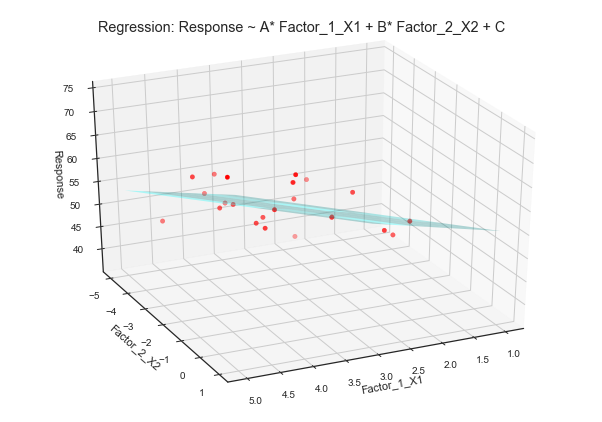

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.suptitle('Regression: Response ~ A* Factor_1_Х1 + B* Factor_2_Х2 + C')
ax = Axes3D(fig)

ax.set_xlabel('Factor_1_Х1')
ax.set_ylabel('Factor_2_Х2')
ax.set_zlabel('Response')
ax.scatter(frame.Factor_1_Х1, frame.Factor_2_Х2, frame.Response, c='red')
ax.plot_surface(x,y,z, color='cyan', alpha=0.3);
ax.view_init(30, 65)#поворот графика

#### Анализ моделей зависящей не только от факторов 1 и 2 но и от года

In [16]:
model_0 = sm.ols(formula='Response ~ Factor_1_Х1 + Factor_2_Х2 + Year', data = frame)
fitted_0 = model_0.fit()
fitted_0.summary(alpha = 0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     16.70
Date:                Sun, 20 May 2018   Prob (F-statistic):           1.48e-05
Time:                        14:50:17   Log-Likelihood:                -62.242
No. Observations:                  23   AIC:                             132.5
Df Residuals:                      19   BIC:                             137.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [99.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -414.8238    255.900     -1.621      0.121     -1146.937   317.289
Factor_1_Х1     4.1066      0.971      4.230      0.000         1.329     6.884
Factor_2_Х2     2.8028      0.543      5.164      0.000         1.250     4.356
Year            0.2299      0.127      1.809      0.086        -0.134     0.594
==============================================================================
Omnibus:                        3.768   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.485
Skew:                           0.801   Prob(JB):                        0.289
Kurtosis:                       3.171   Cond. No.                     6.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Смотрим на парамер P,  по сравнению с факторами 1 и 2, год(P = 0.086) в данной модели не являеться значимым, хотя параметр 	R-squared: увеличился, и вроде бы как модель улучшилась. 

#####  Анализ модели зависящей только от года и фактора 2

In [17]:
model_1 = sm.ols(formula='Response ~ Factor_2_Х2 + Year', data = frame)
fitted_1 = model_1.fit()
fitted_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     8.727
Date:                Sun, 20 May 2018   Prob (F-statistic):            0.00188
Time:                        14:50:17   Log-Likelihood:                -69.873
No. Observations:                  23   AIC:                             145.7
Df Residuals:                      20   BIC:                             149.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -393.2791    347.480     -1.132      0.271     -1118.111   331.552
Factor_2_Х2     2.7187      0.737      3.690      0.001         1.182     4.255
Year            0.2266      0.173      1.313      0.204        -0.134     0.587
==============================================================================
Omnibus:                        0.219   Durbin-Watson:                   2.566
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.354
Skew:                           0.192   Prob(JB):                        0.838
Kurtosis:                       2.529   Cond. No.                     6.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Аналогично предидущим достверность для года не очень.

# 4.с  Провести анализ выполнения предположений линейной модели: нормальность остатков, однородность дисперсий

In [42]:
fitted.resid_pearson
#fitted.resid

array([ 1.70646026, -1.0904508 , -1.32444958,  0.83251409, -1.36919101,
       -0.07971903, -0.81408659, -0.22000854, -0.31504033, -1.44967158,
       -0.71775128, -0.72652715,  1.34065745, -0.07231346,  0.29080483,
        1.42068908, -0.50019799, -0.36291664, -0.07112461,  0.49761932,
        1.0756516 ,  0.87669309,  1.07235887])

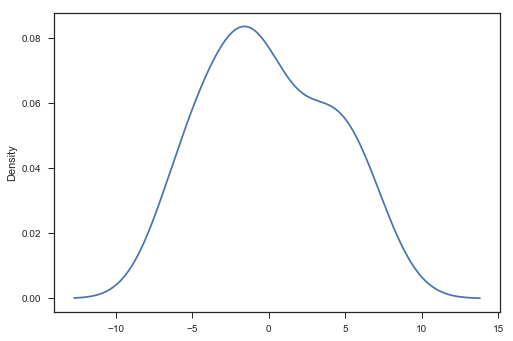

In [44]:
fitted.resid.plot.density();

##### Очень похоже на нормальное расспределение)))) 

## Теперь проверим однородность дисперсий или Homoscedasticity

##### Тест Бройша — Пагана или Бреуша — Пагана (англ. Breusch-Pagan test) — один из статистических тестов для проверки наличия гетероскедастичности случайных ошибок регрессионной модели. Применяется, если есть основания полагать, что дисперсия случайных ошибок может зависеть от некоторой совокупности переменных. При этом в данном тесте проверяется линейная зависимость дисперсии случайных ошибок от некоторого набора переменных.

In [67]:
from statsmodels.stats import diagnostic as dia
het = dia.het_breushpagan(fitted.resid,frame[['Factor_1_Х1','Factor_2_Х2']][0:])

print ('p-value: ', het[-1])

p-value:  0.000369938509156


#####   Так как данное значение почти 0 то мы имеем однородную вариативность значений наблюдений. Гетероскедастичность не обнаружена

# 4.d  Спрогнозировать значение отклика и его 95% -доверительный интервалы для X1 = 5, X2 = - 0.5.

###### Даные значение величин(X1 = 5, X2 = - 0.5) лежат в допустимых границах прогнозирования, поэтому подставим их в нашу модель, при этом пересчитаем доверительные интервалы для коэфициентов для вероятности 95 %

In [71]:
fitted.conf_int(alpha=0.05, cols=None)#Доверительный интервал 95 % точность

,0,1
Intercept,40.055762,56.186469
Factor_1_Х1,1.958321,6.232648
Factor_2_Х2,1.788904,4.145014


In [97]:
#model.predict([1,2])
fitted.predict()

array([ 48.91197186,  62.21685543,  64.2611443 ,  70.17812557,
        50.13934397,  53.54532888,  56.07436129,  59.00544052,
        59.57518079,  57.77787617,  59.86913794,  61.48605262,
        53.94067918,  45.84417821,  54.01676306,  65.70403538,
        60.50402512,  64.55656694,  58.58917744,  54.54682175,
        57.81539569,  61.88229172,  64.34924618])

In [104]:
fitted.PredictionResults

AttributeError: 'OLSResults' object has no attribute 'PredictionResults'

## Тестовые вещи по программе

In [ ]:
#import statsmodels.formula.api as sm
#model = sm.ols(formula='Response ~ Factor_2_Х2', data = frame)
#fitted = model.fit()
#fitted.summary().tables[1]

In [ ]:
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#lr.fit(frame[["Factor_1_Х1"]], frame[["Response"]])
#print(lr.coef_)
#print(lr.intercept_)